# Statistical Modeling Explains FIFA Player Ratings #

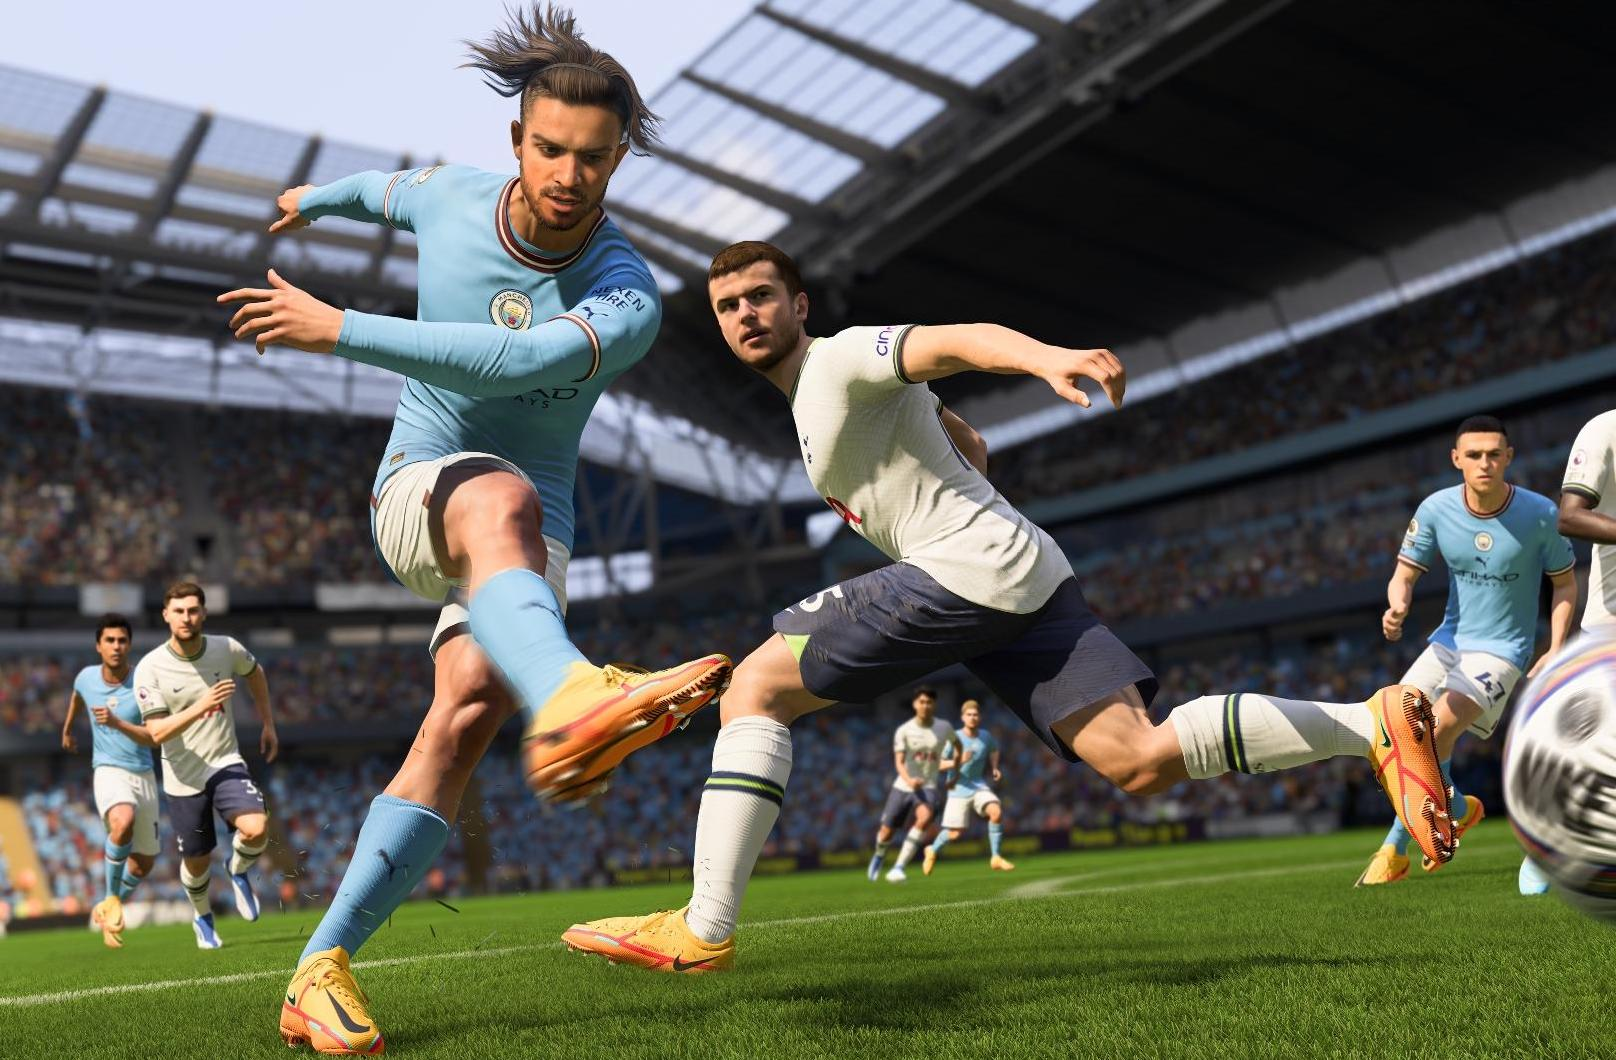

## Introduction

I'm a fan of football (or soccer, depending on your persuasion). An avid follower of the English Premier League (which I believe is the most challenging & entertaining domestic championship in the world), I spend some of my free time watching the matches and reading up on or listening to what the pundits and journalists have to say.

It's interesting seeing different perspectives trying to make sense of various aspects of the game, particularly when it comes to player evaluation. Debates and clashes are very often in this realm, and that's fair enough, for it's such a complex sport with so many variables at play.

Objectivity may be elusive in this topic, yet one can still search for guidance. It's usually recommended practice to consult the ultimate authority to get a solid view on something so complicated. That entity in this case is FIFA, a hugely popular video game series developed by American game maker Electronic Arts featuring real-world footballers with overall ratings updated regularly to reflect their respective performance levels in the latest professional season.

As shown in the image, Argentinian legend Lionel Messi was given an impressive overall of 93 at the beginning of FIFA 22. That comes with 85 pace, 92 shooting, 91 passing, 95 dribbling, 34 defending, and 65 physicality. Each of those are shaped by more granular subjects beyond the card image - 'shooting' for example, is further segmented by 'finishing', 'positioning', 'shot power', 'long shots', 'penalties', and 'volleys'.

These numbers were intriguing enough to prompt me a number of questions of genuine curiosity, namely: "Who are the people involved in the management of the database?", "How do they measure things to come up with all those attribute ratings?", and "How do they crunch those ratings to ultimately rank each player?".

I looked up online to see if I could find the answers to these questions. [This article](https://www.goal.com/en/news/fifa-player-ratings-explained-how-are-the-card-number--stats-decided/1hszd2fgr7wgf1n2b2yjdpgynu) I found touches on all three of them. Long story short, EA Sports employes a team of internal producers and external data contributors. Their job, which is to watch players and make observations about them to keep the database up-to-date, is helped by constant suggestions from thousands of FIFA Data Reviewers made up of coaches, scouts, and hardcore fans from all over the world. As for the maths for overall ratings, each playing position is assigned "positional coefficients" tailored to that position according to  which attributes matter by how much. These coefficients are used to calculate the weighted sum of scores which are rounded before international reputation decides the final figure.

That's only scratching the surface though. I was interested in diving into how they turned real-life observations to determine every in-game statistic and what the criteria for appraising players of each kind was. By the time of writing this I failed to find a webpage that went into satisfactory details with these matters.

Then it hit me: I can figure this out myself. Sure the measuring part may be a very long shot (chances are, I don't even have sufficient data), but at least I should be able to work out the end formulas, knowing that the overall ratings were linearly related to the constituent ratings. As it happens I'd been hoping to put into practice what I'd learned about linear regression analysis, so there goes the inspiration behind this personal project.

## The Question & The Dataset

The question stated to full extent is this.

In the FIFA video game series, how is a player's overall rating calculated? To be specific, how much influence does each relevant predictor have over an overall of a player? Put succintly, what are the "positional coefficients" for that player?

As for the dataset, I chose to work with data pertaining to men's ratings in FIFA 22 found on 
[this Kaggle page](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset).

The dataset satisfies the following check list for choosing an apt data source.

Usability
- The data dictionary is well-established.
- The dataset is comprehensive enough in that it has all kinds of data necessary for the project.
- The extent of missingness in the dataset poses no problem going forward.

Credibility
- The dataset has been scraped from SoFIFA, a website visited daily by millions of users around the world. 
- The Kaggle user Stefano Leone has a history of publishing on Kaggle past FIFA player ratings datasets upvoted by many other users.
- Initial exploration failed to spot a data entry error.

Morality
- The dataset is under [this license](https://creativecommons.org/publicdomain/zero/1.0/)
which allows users around the world to freely make use of it without having to ask for permissions.
- The fact the data originally comes from a publicly available video game product renders any privacy concerns moot.

## Data Wrangling

### Dropping Irrelevant Data

Provided the data to be processed is confirmed to be reliable and workable (a point already proven), the very first step of data wrangling is to lose any data of no purpose, for it would be waste of valuable resources otherwise.

In [1]:
import pandas as pd # Python library for data wrangling and basic analysis
all_players = pd.read_csv("/Users/Jun/Desktop/players_22.csv") # Reading in the dataset
all_players.head(5) # Displaying the first five rows

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


This table consists of 110 features, the data dictionary for which sits atop the data explorer for "players_22.csv" (found on the Kaggle webpage). Taking into account the methodology described in the article led to selecting the following features to move forward with.

In [2]:
# Keep only the following features
all_players = all_players[["long_name", "dob", "player_positions", "overall", 
                           "international_reputation", "attacking_crossing", 
                           "attacking_finishing", "attacking_heading_accuracy", 
                           "attacking_short_passing", "attacking_volleys",
                           "skill_dribbling", "skill_curve", "skill_fk_accuracy", 
                           "skill_long_passing", "skill_ball_control", "movement_acceleration", 
                           "movement_sprint_speed", "movement_agility", "movement_reactions", 
                           "movement_balance", "power_shot_power", "power_jumping", 
                           "power_stamina", "power_strength", "power_long_shots", 
                           "mentality_aggression", "mentality_interceptions", 
                           "mentality_positioning", "mentality_vision", "mentality_penalties", 
                           "mentality_composure", "defending_marking_awareness", 
                           "defending_standing_tackle", "defending_sliding_tackle", 
                           "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", 
                           "goalkeeping_positioning", "goalkeeping_reflexes", "goalkeeping_speed"]] 

### Ensuring Data Consistency

What's next is accounting for duplicates and unwanted variations. This is also a step where outliers stemming from measurement error are addressed. Histograms shown by the aforementioned data explorer make no indication of existence of such outliers, so the numerical features need no modification for now.

As for duplication handling, assuming no two different players have the same full name and the same birthdate, features "long_name" and "dob" can confirm that each player appears only once.

In [3]:
# Show all player duplicate instances
all_players[all_players.duplicated(subset = ["long_name", "dob"], keep = "first")]
# Dropping features no longer needed
all_players.drop(columns = ["long_name", "dob"], inplace = True)

Standardisation is necessary as unrefined categorisation can be costly down the road.

"player_positions" now lists all probable playing positions for each player, with the primary role for that player placed first. As an example, Brazilian superstar Neymar Jr. can do both LW and CAM, though the former is seen as his main. For analysis purpose it would be best to label him "Winger", for that strikes the right balance between oversimplification and overspecification.

Below Python code resets "player_positions" to accomodate only the first-class roles and lose the left-right distinction.

In [4]:
# From "player_positions" to "primary_position"
all_players["player_positions"] = all_players["player_positions"].str.split(",").str[0]

d = {"ST":"Striker", "CF":"Centre Forward", "LW":"Winger", "RW":"Winger", 
     "CAM":"Central Attacking Midfielder", "CM":"Central Midfielder", "LM":"Side Midfielder", 
     "RM":"Side Midfielder", "CDM":"Central Defensive Midfielder", "LWB":"Wing Back", 
     "RWB":"Wing Back", "LB":"Full Back", "RB":"Full Back", "CB":"Centre Back", "GK":"Goalkeeper"}

all_players["player_positions"] = all_players["player_positions"].map(d)
all_players.rename(columns = {"player_positions":"primary_position"}, inplace = True)
all_players["primary_position"].unique() # Sanity check

array(['Winger', 'Striker', 'Central Midfielder', 'Goalkeeper',
       'Central Defensive Midfielder', 'Centre Forward',
       'Side Midfielder', 'Centre Back', 'Central Attacking Midfielder',
       'Full Back', 'Wing Back'], dtype=object)

### Merging Data Tables

There's just one table to work with, so this step is skipped.

### Handling Missing Data

Below heatmap visualises the extent of missingness exhibited by the master table at this point.

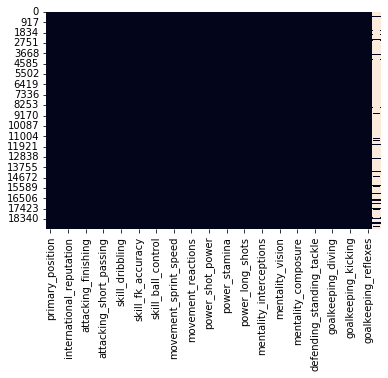

In [6]:
# Python libraries for data visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Generating the heatmap
sns.heatmap(all_players.isnull(), cbar = False)
plt.show()

All features are complete, except for "goalkeeping_speed", which is expectedly missing for all non-goalkeepers.

### Feature Adaptation

With all wanted features present and their consistencies assured, the last task is to adapt a feature so that it is better suited for analysis.

International reputation can improve a player's rating by as many as three points. It's better to incorporate this knowledge before statistics does guesswork; "overall" should be modified to show ratings before reputation boost.

In [7]:
# Function to return the pre-reputation overall
def raw_overall(overall_and_rep): 
    overall = overall_and_rep[0]
    rep = overall_and_rep[1]
    
    # Three-stars: +1 boost for 51+ 
    if rep == 3 and overall >= 52:
        return overall - 1
    
    # Four-stars: +2 boost for 67+, +1 boost for the rest
    elif rep == 4:
        if overall <= 67:
            return overall - 1
        else:
            return overall - 2
    
    # Five-stars: +3 boost for 75+, +2 boost for 50+, and +1 boost for the rest
    elif rep == 5:
        if overall <= 50:
            return overall - 1
        elif overall <= 76:
            return overall - 2
        else:
            return overall - 3
        
    # No boost otherwise
    else:
        return overall
    
# "raw_overall" is the new "overall"
new = all_players[["overall", "international_reputation"]].apply(raw_overall, axis = 1)
all_players["raw_overall"] = new

# Discarding done features
all_players.drop(columns = ["overall", "international_reputation"], inplace = True)

The dataset is now fully ready for use.

In [8]:
all_players.head(5) # What the final dataset looks like

,primary_position,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,raw_overall
0,Winger,85,95,70,91,88,96,93,94,91,...,20,35,24,6,11,15,14,8,NaN,90
1,Striker,71,95,90,85,89,85,79,85,70,...,35,42,19,15,6,12,8,10,NaN,89
2,Striker,87,95,90,80,86,88,81,84,77,...,24,32,24,7,11,15,14,11,NaN,88
3,Winger,85,83,63,86,86,95,88,87,81,...,35,32,29,9,9,15,15,11,NaN,88
4,Central Midfielder,94,82,55,94,82,88,85,83,93,...,68,65,53,15,13,5,10,13,NaN,89


## Analysis

Obviously, there has to be a unique model for each playing position.

The rest of this section is dedicated to demonstrating the steps to the final model for strikers.

### Model Fitting

A typical first step is to throw in all suspects and see how the fit is.

In [9]:
strikers = all_players[all_players["primary_position"] == "Striker"] # Strikers only
Y = strikers["raw_overall"] # The response variable
X = strikers.iloc[:,1:-7] # The explanatory variables

Note: further partitioning for testing purpose is skipped here because 1) the goal is to explain ratings calculation rather than to build a generalised model for accurate prediction and 2) overfitting can always be avoided via model selection or regularisation.

In [10]:
import statsmodels.api as sm # Python module for statistical modeling
X = sm.add_constant(X) # The algorithm requires a column of ones to be manually appended
ST_model = sm.OLS(Y, X).fit() # Applying the algorithm to the sets
ST_model.summary() # Summary of the initial all-in model

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            raw_overall   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.563e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:24:29   Log-Likelihood:                -857.03
No. Observations:                2608   AIC:                             1774.
Df Residuals:                    2578   BIC:                             1950.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2238      0.097      2.313      0.021       0.034       0.414
attacking_crossing             -0.0006      0.001     -0.688      0.491      -0.002       0.001
attacking_finishing             0.1865      0.002     80.301      0.000       0.182       0.191
attacking_heading_accuracy      0.0967      0.001     66.527      0.000       0.094       0.100
attacking_short_passing         0.0515      0.002     29.274      0.000       0.048       0.055
attacking_volleys               0.0186      0.001     14.731      0.000       0.016       0.021
skill_dribbling                 0.0689      0.002     32.112      0.000       0.065       0.073
skill_curve                 -8.843e-07      0.001     -0.001      0.999      -0.002       0.002
skill_fk_accuracy              -0.0023      0.001     -2.901      0.004      -0.004      -0.001
skill_long_passing              0.0018      0.001      1.609      0.108      -0.000       0.004
skill_ball_control              0.1046      0.002     42.620      0.000       0.100       0.109
movement_acceleration           0.0383      0.001     25.644      0.000       0.035       0.041
movement_sprint_speed           0.0496      0.001     36.933      0.000       0.047       0.052
movement_agility               -0.0006      0.001     -0.556      0.578      -0.003       0.002
movement_reactions              0.0842      0.002     49.839      0.000       0.081       0.087
movement_balance                0.0003      0.001      0.391      0.696      -0.001       0.002
power_shot_power                0.0961      0.002     56.133      0.000       0.093       0.099
power_jumping                  -0.0009      0.001     -1.146      0.252      -0.002       0.001
power_stamina                   0.0024      0.001      2.918      0.004       0.001       0.004
power_strength                  0.0478      0.001     52.234      0.000       0.046       0.050
power_long_shots                0.0276      0.002     16.942      0.000       0.024       0.031
mentality_aggression            0.0004      0.001      0.616      0.538      -0.001       0.002
mentality_interceptions        -0.0001      0.001     -0.105      0.916      -0.002       0.002
mentality_positioning           0.1316      0.002     60.771      0.000       0.127       0.136
mentality_vision               -0.0017      0.001     -1.329      0.184      -0.004       0.001
mentality_penalties            -0.0008      0.001     -0.747      0.455      -0.003       0.001
mentality_composure            -0.0044      0.001     -3.149      0.002      -0.007      -0.002
defending_marking_awareness    -0.0009      0.001     -1.011      0.312      -0.003       0.001
defending_standing_tackle       0.0028      0.001      2.178      0.030       0.000       0.005
defending_s

### Model Validation

To see how the fit is to inspect the initial all-in model for validity.

OLS linear regression assumes the following:

1) Linearity: A linear model must be the correct choice to address the pattern exhibited by the data. Violation of this means that linear regression is not the best option.

2) Exogeneity: All the independent variables must be unrelated to the residuals. Violation of this means that the errors, which should be unpredictable, are actually predictable. This happens when an "independent variable" is actually dependent on the response variable.

3) Zero-averaging Residuals: The mean of the residuals is zero. Violation of this means the average error is a non-zero value, so this is never a concern so long as there is a constant term in the model.

4) Independence of Residuals: The residuals are not serially correlated. In other words, there is no autocorrelation. Violation results in less precise estimatation of coefficients.

5) Homoscedascity: The variance of residuals is constant across all levels of fit. Violation of this is costly - estimation loses precision (though still unbiased) and p-values tend to be smaller than they should be because variance inflation goes undetected by OLS method. 

6) Normality of Residuals (optional): Violation of this does not stand in the way of getting unbiased estimates with minimal variance. That said, it can affect the reliability of confidence intervals and hypothesis testing results. Fortunately, OLS is robust to this condition especially at large sample sizes.

It goes without saying that the attribute ratings are not dependent upon the overall ratings.

As for others, diagnostic plots and test statistics like the ones displayed above provide a convenient way of examination. In this case a Durbin-Watson just short of 2 gives green light to the fourth assumption (a statistic close to 0 or 4 indicates autocorrelation). While both the Prob(JB) and the Prob(Omnibus) cry departure from normality, the extent is acceptable judging from the Skew and the Kurtosis. Most certainly model interpretation remains perfectly fine.

A scatterplot of residuals vs. fitted values says a lot about residuals.

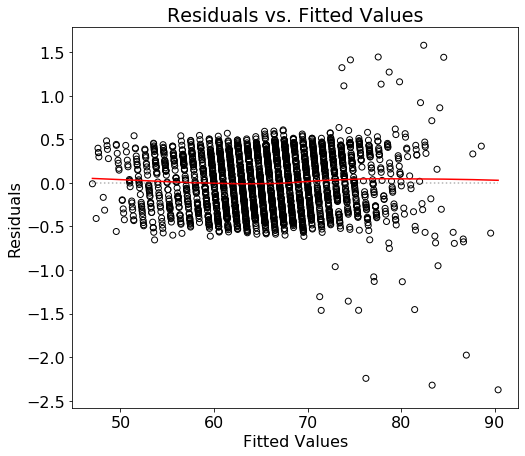

In [11]:
# LOWESS (Locally Weighted Scatterplot Smoothing) is commonly used for visualisation of general trends
from statsmodels.nonparametric.smoothers_lowess import lowess
residuals = ST_model.resid 
fitted = ST_model.fittedvalues
smoothed = lowess(residuals, fitted)

# Creating the residuals vs. fitted values plot
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0], smoothed[:,1], color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted Values')
ax.plot([min(fitted), max(fitted)], [0, 0], color = 'k', linestyle = ':', alpha = 0.3)
plt.show()

Absence of curvature means a linear model is the correct choice. That the residuals spread more or less evenly with respect to the horizontal zero line means residuals indeed average zero. The only issue is heteroscedascity, the antithesis of homoscedascity, as evinced by noticeably wider gaps among residuals in the region of 70s and above.

Heteroscedascity means the displayed p-values may be inaccurate. This potentially hinders in identifing statistically significant predictors, a main objective of this project. Fortunately, convenient remedies exist and one of such is heteroscedascity-consistent standard errors. HC errors help relieve the negative heteroscedascity-driven effect of reduced accuracy of p-values. The cost of incorporating this to the model is negligible, so there's no reason not to take advantage of it.

Aside from the assumptions, one must also watch out for influential outliers and multicolinearity. 

An observation is an influential outlier if its residual is large and its so-called influence on the model is substantial. Under this event the linear model leans to the observation at the expense of deviating from the general pattern. As long as it matters to best capture the consensus, the model shouldn't be doing this even if there's nothing inherently wrong with the data point and accounting for that data point results in better goodness-of-fit scores.

Cook's distance quantifies the extent of an observation's influence. As a rule, it takes a value over 1 to call it an influencer.

In [12]:
# Calculating the maximum Cook's distance
influence = ST_model.get_influence()
cooks = influence.cooks_distance
cooks[0].max()

0.030132182242885244

Therefore it's safe to dismiss the case when even the maximum Cook's distance is much closer to 0 than it is to 1.

Finally, multicolinearity is when an independent variable is correlated with another. When two predictors strongly go hand in hand (i.e. when a shift in one inevitably leads to a shift in the other), it's difficult to properly measure the real individual effects. This is why the presence of multicolinearity contributes to wider confidence intervals, which in turn makes it harder to tell the relative importance of each.

A simple method for detecting it is calculating the variance inflation factors. Generally speaking, an independent variable with variance increased fivefold or more (some say ten-plus) should be up for potential change.

In [13]:
# Finding out the VIF for each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
print(pd.Series([vif(X.values, i) for i in range(X.shape[1])], index = X.columns))

const                          213.671661
attacking_crossing               2.701395
attacking_finishing              6.723202
attacking_heading_accuracy       4.038104
attacking_short_passing          5.369020
attacking_volleys                3.958366
skill_dribbling                  6.704179
skill_curve                      3.154096
skill_fk_accuracy                2.433883
skill_long_passing               3.300654
skill_ball_control               8.292798
movement_acceleration            6.175589
movement_sprint_speed            4.757339
movement_agility                 3.351692
movement_reactions               4.984337
movement_balance                 2.377326
power_shot_power                 4.955697
power_jumping                    1.610951
power_stamina                    1.687453
power_strength                   2.691777
power_long_shots                 4.137887
mentality_aggression             2.036535
mentality_interceptions          2.280424
mentality_positioning            7

Understanding precisely what multicolinearity has done to the model is pivotal to deciding whether to resolve the issue. It may be that the most serious multicolinearity told by VIF doesn't really do much to require further action.

Both "skill_ball_control" and "mentality_positioning", though their variances have been eightfolded, still have sizeable coefficient estimates and confidence intervals that do not overlap with any. That is to say, they both still contribute to the model uniquely and meaningfully. The same goes for all other five-plus-folded features: "attacking_finishing", "attacking_short_passing", "skill_dribbling", and "movement_acceleration".

### Model Selection

The model of this stage is still suboptimal in that there are predictors that should be left out because their contribution is negligible. Such deadweights also render the model unnecessarily complicated.

A common method for feature selection (or model selection) is backward elimination, whereby the most unworthy predictor gets kicked out in each round of evaluation until the stopping condition is met. That condition is usually when all p-values are not greater than 0.05 or an information criterion such as AIC or BIC is at its minimum.

The following Python code goes through backward elimination with the p-value threshold set at 0.01 to help select the final model.

In [14]:
cols = list(X.columns) # Candidate features competing for statistical significance

# Algorithm for backward elimination
while len(cols) > 0: # Repeat the following as long as a feature survives
    X = X[cols] # Keep only the features remaining
    model = sm.OLS(Y, X).fit(cov_type = "HC3") # Fit a model adjusted for heteroscedascity
    pvals = pd.Series(model.pvalues.values[1:], index = cols[1:]) # Retrieve the p-values
    fmaxp = pvals.idxmax() # What's the feature with the highest p-value?
    if (pvals[fmaxp] >= 0.01): # Is that p-value greater than or equal to 0.01?
        cols.remove(fmaxp) # If so, eliminate that feature from the candidate pool
    else: # If not,
        break # terminate the procedure

print(cols) # Show me the features left in the end

['const', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_reactions', 'power_shot_power', 'power_strength', 'power_long_shots', 'mentality_positioning', 'mentality_composure', 'defending_standing_tackle']


In [15]:
# The final model based on the final set of predictors
ST_newmodel = sm.OLS(Y, X).fit(cov_type = "HC3")
ST_newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            raw_overall   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.011e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:26:49   Log-Likelihood:                -864.89
No. Observations:                2608   AIC:                             1764.
Df Residuals:                    2591   BIC:                             1864.
Df Model:                          16                                         
Covariance Type:                  HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1780      0.098      1.822      0.068      -0.013       0.370
attacking_finishing            0.1868      0.002     82.005      0.000       0.182       0.191
attacking_heading_accuracy     0.0962      0.001     70.124      0.000       0.094       0.099
attacking_short_passing        0.0520      0.001     36.665      0.000       0.049       0.055
attacking_volleys              0.0185      0.001     16.038      0.000       0.016       0.021
skill_dribbling                0.0687      0.002     34.324      0.000       0.065       0.073
skill_fk_accuracy             -0.0025      0.001     -3.453      0.001      -0.004      -0.001
skill_ball_control             0.1042      0.002     43.551      0.000       0.100       0.109
movement_acceleration          0.0385      0.001     28.210      0.000       0.036       0.041
movement_sprint_speed          0.0498      0.001     37.414      0.000       0.047       0.052
movement_reactions             0.0844      0.002     50.163      0.000       0.081       0.088
power_shot_power               0.0960      0.002     59.030      0.000       0.093       0.099
power_strength                 0.0483      0.001     61.938      0.000       0.047       0.050
power_long_shots               0.0276      0.002     16.219      0.000       0.024       0.031
mentality_positioning          0.1316      0.002     65.430      0.000       0.128       0.136
mentality_composure           -0.0049      0.001     -3.791      0.000      -0.007      -0.002
defending_standing_tackle      0.0030      0.001      3.919      0.000       0.002       0.005
==============================================================================
Omnibus:                      286.903   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.036
Skew:                          -0.482   Prob(JB):                    1.14e-250
Kurtosis:                       6.109   Cond. No.                     3.16e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Taken altogether, a linear equation both statistically and practically meaningful to explain striker ratings minus reputation can be written as below.

E(Y) = 0.18 + 0.187 attacking_finishing + 0.096 attacking_heading_accuracy + 0.052 attacking_short_passing + 0.019 attacking_volleys + 0.069 skill_dribbling + 0.104 skill_ball_control + 0.039 movement_acceleration + 0.05 movement_sprint_speed + 0.084 movement_reactions + 0.096 power_shot_power + 0.048 power_strength + 0.028 power_long_shots +  0.132 mentality_positioning

This model is able to explain more than 99 percent of all variation, meaning it's almost a perfect fit. Unfortunately, the tiny unexplained portion has to be there because of rounding errors, which are impossible to figure out.

As per the confidence intervals, the top five most important striker attributes are "attacking_finishing", "mentality_positioning", "skill_ball_control", and "attacking_heading_accuracy" or "power_shot_power", respectively. This makes sense bearing in mind that a striker's foremost burden is to score goals. Below puts together everything.

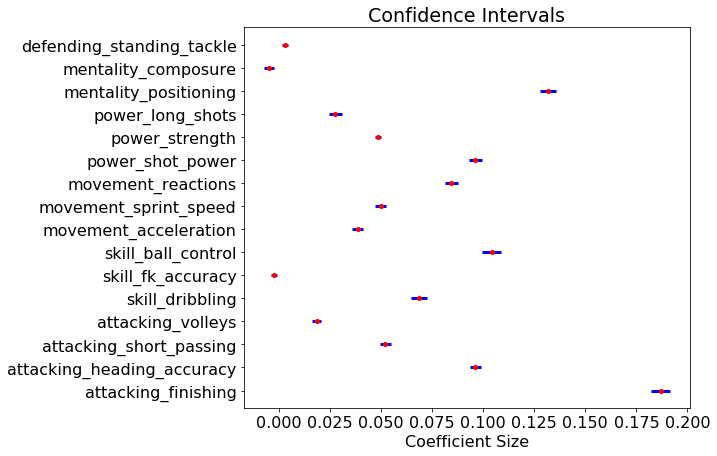

In [16]:
# Python tools for statistics
from scipy import stats
import numpy as np

# Function for visualising confidence intervals
def plot_confidence_intervals(model):

    # Doing the confidence interval bounds because they can't be accessed
    coefs = model.params 
    coefs = coefs.drop('const')
    std_errors = model.bse
    std_errors = std_errors.drop('const')
    z_score = np.abs(stats.norm.ppf((1 - 0.95) / 2))
    lower_bounds = coefs - z_score * std_errors
    upper_bounds = coefs + z_score * std_errors

    # Plotting confidence intervals horizontally
    plt.hlines(y = range(len(coefs)), xmin = lower_bounds, xmax = upper_bounds,
               color = 'b', alpha = 1, linewidth = 3)
    plt.plot(coefs, range(len(coefs)), 'ro', markersize = 4)
    plt.yticks(range(len(coefs)), model.params.index[1:])
    plt.xlabel('Coefficient Size')
    plt.title('Confidence Intervals')
    plt.show()

# Applying the function to sum up the striker model
plot_confidence_intervals(ST_newmodel)

## Conclusion

Models for the rest can be obtained likewise. Below table summarises the findings for each.

In [17]:
positions = ["Striker(ST)", "Centre Forward(CF)", "Winger(LW/RW)", "Central Attacking Midfielder(CAM)", "Central Midfielder(CM)", "Side Midfielder(LM/RM)", "Central Defensive Midfielder(CDM)", "Wing Back(LWB/RWB)", "Full Back(LB/RB)", "Centre Back(CB)", "Goalkeeper(GK)"]

models = ["E(Y) = 0.18 + 0.187 attacking_finishing + 0.096 attacking_heading_accuracy + 0.052 attacking_short_passing + 0.019 attacking_volleys + 0.069 skill_dribbling + 0.104 skill_ball_control + 0.039 movement_acceleration + 0.05 movement_sprint_speed + 0.084 movement_reactions + 0.096 power_shot_power + 0.048 power_strength + 0.028 power_long_shots + 0.132 mentality_positioning",
          "E(Y) = 0.11 + 0.113 attacking_finishing + 0.026 attacking_heading_accuracy + 0.084 attacking_short_passing + 0.137 skill_dribbling + 0.157 skill_ball_control + 0.048 movement_acceleration + 0.053 movement_sprint_speed + 0.091 movement_reactions + 0.046 power_shot_power + 0.036 power_long_shots + 0.131 mentality_positioning + 0.077 mentality_vision",
          "E(Y) = 0.48 + 0.093 attacking_crossing + 0.1 attacking_finishing + 0.092 attacking_short_passing + 0.147 skill_dribbling + 0.146 skill_ball_control + 0.073 movement_acceleration + 0.059 movement_sprint_speed + 0.025 movement_agility + 0.073 movement_reactions + 0.036 power_long_shots + 0.089 mentality_positioning + 0.057 mentality_vision",
          "E(Y) = 0.46 + 0.074 attacking_finishing + 0.158 attacking_short_passing + 0.133 skill_dribbling + 0.039 skill_long_passing + 0.145 skill_ball_control + 0.038 movement_acceleration + 0.031 movement_sprint_speed + 0.03 movement_agility + 0.073 movement_reactions + 0.049 power_long_shots + 0.091 mentality_positioning + 0.136 mentality_vision",
          "E(Y) = 0.02 attacking_finishing + 0.164 attacking_short_passing + 0.069 skill_dribbling + 0.132 skill_long_passing + 0.146 skill_ball_control + 0.084 movement_reactions + 0.06 power_stamina + 0.039 power_long_shots + 0.047 mentality_interceptions + 0.058 mentality_positioning + 0.13 mentality_vision + 0.052 defending_standing_tackle",
          "E(Y) = 1.26 + 0.102 attacking_crossing + 0.062 attacking_finishing + 0.108 attacking_short_passing + 0.149 skill_dribbling + 0.046 skill_long_passing + 0.135 skill_ball_control + 0.067 movement_acceleration + 0.059 movement_sprint_speed + 0.069 movement_reactions + 0.047 power_stamina + 0.083 mentality_positioning + 0.069 mentality_vision",
          "E(Y) = 0.97 + 0.147 attacking_short_passing + 0.096 skill_long_passing + 0.103 skill_ball_control + 0.072 movement_reactions + 0.059 power_stamina + 0.04 power_strength + 0.049 mentality_aggression + 0.139 mentality_interceptions + 0.042 mentality_vision + 0.085 defending_marking_awareness + 0.125 defending_standing_tackle + 0.047 defending_sliding_tackle",
          "E(Y) = 2.16 + 0.119 attacking_crossing + 0.1 attacking_short_passing + 0.033 skill_dribbling + 0.079 skill_ball_control + 0.047 movement_acceleration + 0.054 movement_sprint_speed + 0.083 movement_reactions + 0.094 power_stamina + 0.115 mentality_interceptions + 0.071 defending_marking_awareness + 0.108 defending_standing_tackle + 0.097 defending_sliding_tackle",
          "E(Y) = 2.11 + 0.092 attacking_crossing + 0.039 attacking_heading_accuracy + 0.072 attacking_short_passing + 0.074 skill_ball_control + 0.051 movement_acceleration + 0.067 movement_sprint_speed + 0.083 movement_reactions + 0.078 power_stamina + 0.117 mentality_interceptions + 0.079 defending_marking_awareness + 0.113 defending_standing_tackle + 0.139 defending_sliding_tackle",
          "E(Y) = 0.4 + 0.097 attacking_heading_accuracy + 0.05 attacking_short_passing + 0.042 skill_ball_control + 0.02 movement_sprint_speed + 0.05 movement_reactions + 0.029 power_jumping + 0.096 power_strength + 0.069 mentality_aggression + 0.132 mentality_interceptions + 0.138 defending_marking_awareness + 0.179 defending_standing_tackle + 0.094 defending_sliding_tackle",
          "E(Y) = 1.4 + 0.108 movement_reactions + 0.206 goalkeeping_diving + 0.207 goalkeeping_handling + 0.051 goalkeeping_kicking + 0.209 goalkeeping_positioning + 0.213 goalkeeping_reflexes"]

scores = [0.997, 0.998, 0.998, 0.997, 0.998, 0.997, 0.997, 0.997, 0.997, 0.998, 0.998]

top_fives = ["attacking_finishing (0.182, 0.191), mentality_postitioning (0.128, 0.136), skill_ball_control (0.100, 0.109), attacking_heading_accuracy (0.094, 0.099), power_shot_power (0.093, 0.099)",
             "skill_ball_control (0.131, 0.182), skill_dribbling (0.113, 0.161), mentality_positioning (0.128, 0.136), attacking_finishing (0.094, 0.132), movement_reactions (0.068, 0.113)",
             "skill_dribbling (0.140, 0.154), skill_ball_control (0.138, 0.154), attacking_finishing (0.094, 0.105), attacking_crossing (0.088, 0.098), attacking_short_passing (0.086, 0.098)",
             "attacking_short_passing (0.150, 0.166), skill_ball_control (0.136, 0.153), mentality_vision (0.130, 0.141), skill_dribbling (0.125, 0.140), mentality_positioning (0.086, 0.096)",
             "attacking_short_passing (0.157, 0.170), skill_ball_control (0.140, 0.152), skill_long_passing (0.127, 0.138), mentality_vision (0.126, 0.134), movement_reactions (0.080, 0.088)",
             "skill_dribbling (0.145, 0.154), skill_ball_control (0.130, 0.141), attacking_short_passing (0.103, 0.113), attacking_crossing (0.099, 0.105), mentality_positioning (0.079, 0.087)",
             "attacking_short_passing (0.141, 0.154), mentality_interceptions (0.134, 0.144), defending_standing_tackle (0.118, 0.131), skill_ball_control (0.098, 0.108), skill_long_passing (0.091, 0.101)",
             "attacking_crossing (0.110, 0.128), mentality_interceptions (0.103, 0.127), defending_standing_tackle (0.091, 0.124), attacking_short_passing (0.090, 0.109), defending_sliding_tackle (0.082, 0.111)",
             "defending_sliding_tackle (0.134, 0.143), mentality_interceptions (0.113, 0.121), defending_standing_tackle (0.109, 0.118), attacking_crossing (0.089, 0.095), movement_reactions (0.080, 0.087)",
             "defending_standing_tackle (0.174, 0.183), defending_marking_awareness (0.134, 0.142), mentality_interceptions (0.128, 0.136), attacking_heading_accuracy (0.094, 0.099), power_strength (0.094, 0.097)",
             "goalkeeping_reflexes (0.208, 0.218), goalkeeping_positioning (0.204, 0.213), goalkeeping_handling (0.202, 0.212), goalkeeping_diving (0.201, 0.211), movement_reacions (0.106, 0.110)"]

table = pd.DataFrame(data = {"Playing Position": positions, "Final Model": models, "Fit Score (Adjusted R-Squared)": scores, "Top Five Attributes": top_fives})
pd.set_option('display.max_colwidth', 1000)
table

,Playing Position,Final Model,Fit Score (Adjusted R-Squared),Top Five Attributes
0,Striker(ST),E(Y) = 0.18 + 0.187 attacking_finishing + 0.096 attacking_heading_accuracy + 0.052 attacking_short_passing + 0.019 attacking_volleys + 0.069 skill_dribbling + 0.104 skill_ball_control + 0.039 movement_acceleration + 0.05 movement_sprint_speed + 0.084 movement_reactions + 0.096 power_shot_power + 0.048 power_strength + 0.028 power_long_shots + 0.132 mentality_positioning,0.997,"attacking_finishing (0.182, 0.191), mentality_postitioning (0.128, 0.136), skill_ball_control (0.100, 0.109), attacking_heading_accuracy (0.094, 0.099), power_shot_power (0.093, 0.099)"
1,Centre Forward(CF),E(Y) = 0.11 + 0.113 attacking_finishing + 0.026 attacking_heading_accuracy + 0.084 attacking_short_passing + 0.137 skill_dribbling + 0.157 skill_ball_control + 0.048 movement_acceleration + 0.053 movement_sprint_speed + 0.091 movement_reactions + 0.046 power_shot_power + 0.036 power_long_shots + 0.131 mentality_positioning + 0.077 mentality_vision,0.998,"skill_ball_control (0.131, 0.182), skill_dribbling (0.113, 0.161), mentality_positioning (0.128, 0.136), attacking_finishing (0.094, 0.132), movement_reactions (0.068, 0.113)"
2,Winger(LW/RW),E(Y) = 0.48 + 0.093 attacking_crossing + 0.1 attacking_finishing + 0.092 attacking_short_passing + 0.147 skill_dribbling + 0.146 skill_ball_control + 0.073 movement_acceleration + 0.059 movement_sprint_speed + 0.025 movement_agility + 0.073 movement_reactions + 0.036 power_long_shots + 0.089 mentality_positioning + 0.057 mentality_vision,0.998,"skill_dribbling (0.140, 0.154), skill_ball_control (0.138, 0.154), attacking_finishing (0.094, 0.105), attacking_crossing (0.088, 0.098), attacking_short_passing (0.086, 0.098)"
3,Central Attacking Midfielder(CAM),E(Y) = 0.46 + 0.074 attacking_finishing + 0.158 attacking_short_passing + 0.133 skill_dribbling + 0.039 skill_long_passing + 0.145 skill_ball_control + 0.038 movement_acceleration + 0.031 movement_sprint_speed + 0.03 movement_agility + 0.073 movement_reactions + 0.049 power_long_shots + 0.091 mentality_positioning + 0.136 mentality_vision,0.997,"attacking_short_passing (0.150, 0.166), skill_ball_control (0.136, 0.153), mentality_vision (0.130, 0.141), skill_dribbling (0.125, 0.140), mentality_positioning (0.086, 0.096)"
4,Central Midfielder(CM),E(Y) = 0.02 attacking_finishing + 0.164 attacking_short_passing + 0.069 skill_dribbling + 0.132 skill_long_passing + 0.146 skill_ball_control + 0.084 movement_reactions + 0.06 power_stamina + 0.039 power_long_shots + 0.047 mentality_interceptions + 0.058 mentality_positioning + 0.13 mentality_vision + 0.052 defending_standing_tackle,0.998,"attacking_short_passing (0.157, 0.170), skill_ball_control (0.140, 0.152), skill_long_passing (0.127, 0.138), mentality_vision (0.126, 0.134), movement_reactions (0.080, 0.088)"
5,Side Midfielder(LM/RM),E(Y) = 1.26 + 0.102 attacking_crossing + 0.062 attacking_finishing + 0.108 attacking_short_passing + 0.149 skill_dribbling + 0.046 skill_long_passing + 0.135 skill_ball_control + 0.067 movement_acceleration + 0.059 movement_sprint_speed + 0.069 movement_reactions + 0.047 power_stamina + 0.083 mentality_positioning + 0.069 mentality_vision,0.997,"skill_dribbling (0.145, 0.154), skill_ball_control (0.130, 0.141), attacking_short_passing (0.103, 0.113), attacking_crossing (0.099, 0.105), mentality_positioning (0.079, 0.087)"
6,Central Defensive Midfielder(CDM),E(Y) = 0.97 + 0.147 attacking_short_passing + 0.096 skill_long_passing + 0.103 skill_ball_control + 0.072 movement_reactions + 0.059 power_stamina + 0.04 power_strength + 0.049 mentality_aggression + 0.139 mentality_interceptions + 0.042 mentality_vision + 0.085 defending_marking_awareness + 0.125 defending_standing_tackle + 0.047 defending_sliding_tackle,0.997,"attacking_short_passing (0.141, 0.154), mentality_interceptions (0.134, 0.144), defending_standing_tackle (0.118, 0.131), skill_ball_control (0.098, 0.108), skill_long_passing (0.091,

Note: As a result of failing to exclude the rounding errors in the reponse variables, the models attempt to analyse the unintended portions as well. Consequently the true coefficients designed by FIFA differ from the model counterparts, with some disagreeing by admittedly considerable margin. In all likelihood, most are nonetheless on or near target as is the case of CB (the criteria for which as revealed by the article combines 0.15 "defending_marking_awareness", 0.15 "defending_standing_tackle", 0.15 "defending_sliding_tackle", 0.1 "attacking_heading_accuracy", 0.1 "power_strength", 0.08 "mentality_aggression", 0.08 "mentality_interceptions", 0.05 "attacking_short_passing", 0.05 "skill_ball_control", 0.05 "movement_reactions", and 0.04 "power_jumping").